# 1. SMS Chat Analysis
***

## 1.1 Import Data

We will import the SMS chat data into a `Pandas` dataframe

In [11]:
import pandas as pd

# read data from csv file
sms_df = pd.read_csv('clean_nus_sms.csv')

# print first 5 rows from dataset 
sms_df.head()


,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4


In [12]:
# take a quick look at dataframe using dt.info

sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48598 entries, 0 to 48597
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  48598 non-null  int64 
 1   id          48598 non-null  int64 
 2   Message     48595 non-null  object
 3   length      48598 non-null  object
 4   country     48598 non-null  object
 5   Date        48598 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.2+ MB


Some notes
* The `Message` variable has 3 fewer values than the other variables, which will need to be addressed.
* All of the values in the DataFrame are strings, except for the `id` variable.
* There are 48,598 messages present in the DataFrame.
* There are 5 columns in the dataset

## 1.2 Analysis planning

Now that we have a good idea of what the data looks like we can begin planning our analysis.

One of the fundamental values in text messages is what it can tell me about how people communicate. Based on the data, I'm interested in performing sentiment analysis on the `Message` variable, and statistical analysis on how sentiment varies between countries.

With this in mind, this solution pathway will focus on conducting sentiment analysis on messages within the NUS SMS Corpus. Here the goal is to create a model that can classify text to explore the sentiment present and compare the general sentiment of messages between countries in the NUS SMS Corpus.

## 1.3 Choose an NLP model or technique

To accomplish this, I plan to include the following NLP tasks:

* Text preprocessing using regex and NLTK.
* Exploratory data analysis with pandas and seaborn.
* Sentiment analysis using bag-of-words and a Naive Bayes classifier.

## 1.4 Conduct text preprocessing

I want to remove unnecessary characters and words and standardize the casing, so the following text preprocessing tasks are helpful: 

* Noise Removal
    * Empty messages
    * Punctuation
    * Stopwords
    * URLs
    * HTML Tags

* Text Normalization 
    * Lower Casing

### 1.4.1 Remove empty messages

In [20]:
# use .dropna to remove empty rows
sms_df = sms_df.dropna()
len(sms_df)

48595

Three rows were removed where there were no messages

### 1.4.2 Lowercase messages

Now all the messages will be converted to lowercase format using `.str()` method to then use the `.lower()` method

In [24]:
# convert all characters in messges to lowercase 
sms_df['Message_cleaned'] = sms_df['Message'].str.lower()

#view new column 
sms_df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_cleaned
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### 1.4.3 Remove punctuation

Using a similar method we will remove the punctuation using the `.replace()` method

In [27]:
# remove punctuation from message and put back in 
sms_df['Message_cleaned'] = sms_df['Message_cleaned'].str.replace('[^\w\s]','')

# view changes
sms_df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_cleaned
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### 1.4.4 Remove stopwords

In some NLP techniques removing stopwords is an effective approach, but for sentiment analysis removing stopwords can lead to the loss of valuable information. Lets determine if stopwords can be removed in this case or not using `NLTK`

In [30]:
# import nltk library
import nltk
# download stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Iftekhar
[nltk_data]     Alam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# import stopwords
from nltk.corpus import stopwords

# View stopwords in english
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

These stopwords are necessary to understand the sentiment of the message and removing them can alter the meaning of many of the messages. So the stopwords will not be removed.

### 1.4.5 Remove URLs

Some of these messages have URLs which should be removed. Regular expressions will be used to perform the removal.

In [35]:
# import regular expressions library
import re

In [36]:
# define function to remove URLs from messages
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text) 

In [37]:
# remove urls from messages

sms_df['Message_cleaned'] = sms_df['Message_cleaned'].apply(lambda text: remove_urls(text))
#view changes
sms_df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_cleaned
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### 1.4.6 Remove HTML

As before we will remove the HTML from the messages

In [40]:
# define function to remove HTML Tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

In [41]:
# remove HTML tags from messages
sms_df['Message_cleaned'] = sms_df['Message_cleaned'].apply(lambda text: remove_html(text))

#view changes
sms_df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_cleaned
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...


### 1.4.7 Tokenize messages

To do sentiment analysis we will have to tokenize the messages so that they can be processed. The `word_tokenize` module from `nltk` will be used to perform tokenization.

In [44]:
# import tokenizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
# tokenize messages
# Tokenize cleaned messages
sms_df['Message_tokenized'] = sms_df.apply(lambda x: nltk.word_tokenize(x['Message_cleaned']), axis=1)
sms_df.head()

[nltk_data] Downloading package punkt to C:\Users\Iftekhar
[nltk_data]     Alam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,id,Message,length,country,Date,Message_cleaned,Message_tokenized
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat...,"[bugis, oso, near, wat, ...]"
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ..."
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......"
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la...,"[meet, after, lunch, la, ...]"


In [45]:
# Save the preprocessed DataFrame
sms_df.to_csv('processed_clean_nus_sms.csv', header = True)

## 1.5 Conduct Analysis

### 1.5.1 Exploratory Data Analysis

It is time to conduct exploratory data analysis. I will create visualizations of the data to get a better understanding of the data or any patterns

In [49]:
# Import libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Magic function for plotting in notebook
%matplotlib inline

Lets take a look at the `country` column to see how many countries there are in the data. `.nunique()` method will be used to count the number of unique countries 

In [51]:
# count number of unique countries
sms_df['country'].nunique()

40

There are 40 countries represented in this dataset. We can also view the number of messages per country.

In [53]:
# view number of messages per country
sms_df['country'].value_counts()

country
Singapore              22013
SG                      9804
India                   6901
United States           3749
USA                     1931
Sri Lanka               1017
Malaysia                 766
Pakistan                 751
unknown                  602
Canada                   198
Bangladesh               126
China                    107
india                    105
INDIA                     79
Philippines               67
Indonesia                 48
Nepal                     39
srilanka                  30
United Kingdom            30
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Turkey                    10
Trinidad and Tobago       10
Lebanon                   10
Slovenia                  10
Nigeria                   10
New Zealand               10
Macedonia                 10
UK                        10
Morocco                    9
Romania                    9
Austra

Looking at this there are some duplicates, `SG` represents Singapore while `USA` is for the United States. So the values need to be cleaned so that the data is not so split up. `.replace()` method will be used to fix this.

In [55]:
# Correct values
sms_df = sms_df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})
#count the real number of unique countries
sms_df['country'].nunique()

33

In [56]:
# view number of messages per country
sms_df['country'].value_counts()

country
Singapore              31817
India                   7085
United States           5680
Sri Lanka               1047
Malaysia                 767
Pakistan                 751
Unknown                  602
Canada                   198
Bangladesh               126
China                    107
Philippines               67
Indonesia                 48
United Kingdom            40
Nepal                     39
Hungary                   28
Serbia                    22
Kenya                     20
Ghana                     18
Italia                    10
Trinidad and Tobago       10
Lebanon                   10
Turkey                    10
Nigeria                   10
New Zealand               10
Slovenia                  10
Macedonia                 10
Morocco                    9
Australia                  9
Romania                    9
Jamaica                    8
Barbados                   8
Spain                      5
France                     5
Name: count, dtype: int64

A bar plot will be used to represent the top 10 countries in the data.

In [58]:
# assign number of messages per country to variable
country_value_counts = sms_df['country'].value_counts()

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10) 

# make barplot
top_10_country_value_counts.plot.barh

<bound method PlotAccessor.barh of <pandas.plotting._core.PlotAccessor object at 0x000002AC8F1682D0>>

Here we see that the United States, India, and Singapore make then majority of the messages in the dataset.

### 1.5.2 Sentiment Analysis

Now that we are done with EDA, we can move on to sentiment analysis. There are several approaches one can take to analyzing sentiment of text data, and I will primarily use models from the NLTK library. Here a message will be categorized into one of two categories:

* Positve
* Negative

I will use Naive Bayes classification to determining the sentiment of the messages in the `Message` variable. This will involve using Twitter data with known sentiments to create a classifier. 


In [62]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to C:\Users\Iftekhar
[nltk_data]     Alam\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Iftekhar Alam\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Iftekhar
[nltk_data]     Alam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
# import the twitter data
from nltk.corpus import twitter_samples

The first step is to instantiate tweets that are labelled as positive and negative to create a training set to feed into a classifier.

In [65]:
# Instantiate positive tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
# Instantiate negative tweets
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [66]:
# View first positive tweet
print(positive_tweets[0])
# View number of positive tweets
print('There are {} positive tweets.'.format(len(positive_tweets)))

#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
There are 5000 positive tweets.


In [67]:
# View first negative tweet
print(negative_tweets[0])
# View number of negative tweets
print('There are {} negative tweets.'.format(len(negative_tweets)))

hopeless for tmr :(
There are 5000 negative tweets.


The number of positive and negative tweets are evenly distributed, which is good for training. THe words will need to be tokenized.

In [69]:
# Create tokens from the positive tweets
pos_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
# Show the first tokenized tweet
print(pos_tweet_tokens[0])

# Create tokens from the positive tweets
neg_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')
# Show the first tokenized tweet
print(neg_tweet_tokens[0])

['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
['hopeless', 'for', 'tmr', ':(']


As with the messages the HTML tages and URLs will need to be removed in the tweets.

In [71]:
# Define lists for preprocessed tokens
positive_cleaned_tweets_list = []
negative_cleaned_tweets_list = []

# Positive tokens
for tweet in pos_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    positive_cleaned_tweets_list.append(cleaned_tweet)

# Negative tokens
for tweet in neg_tweet_tokens:
    cleaned_tweet = []
    for token in tweet:
        # Remove URLs
        url_cleaned = remove_urls(token)
        # Remove HTML 
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    # Add to list
    negative_cleaned_tweets_list.append(cleaned_tweet)

# Print preprocessed token lists
print(positive_cleaned_tweets_list[:5])
print(negative_cleaned_tweets_list[:5])

[['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)'], ['@Lamb2ja', 'Hey', 'James', '!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks', '!'], ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track', '.', 'When', 'are', 'you', 'in', 'Scotland', '?', '!'], ['@97sides', 'CONGRATS', ':)'], ['yeaaaah', 'yippppy', '!', '!', '!', 'my', 'accnt', 'verified', 'rqst', 'has', 'succeed', 'got', 'a', 'blue', 'tick', 'mark', 'on', 'my', 'fb', 'profile', ':)', 'in', '15', 'days']]
[['hopeless', 'for', 'tmr', ':('], ['Everything', 'in', 'the', 'kids', 'section', 'of', 'IKEA', 'is', 'so', 'cute', '.', 'Shame', "I'm", 'nearly', '19', 'in', '2', 'months', ':('], ['@Hegelbon', 'That', 'heart', 'sliding', 'into', 'th

Now the features need to chosen for the classifier. The most common words in the corpus will be used as they can be the best indicators of whether something is positive or negative. 

In [73]:
#create a list of all the tweets
list_of_all_tweets = positive_cleaned_tweets_list + negative_cleaned_tweets_list

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130052

In [74]:
#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

22690
[(':(', 4586), (':)', 3693), ('!', 2675), ('I', 2477), ('.', 2433), ('to', 2133), ('you', 2001), ('the', 1845), ('', 1753), (',', 1698)]


[':(', ':)', '!', 'I', '.']

Now to create a feature extractor to detect whether a feature is present in a message.

In [76]:
def document_features(document, sentiment_features):
    # make set list of all tokens in message
    document_tokens = set(document)
    features = {}
    # for all features, check if feature is in message
    for token in sentiment_features:
        #make dictionary for message
        features[token] = (token in document_tokens)
    return features

#test it on a sample sentence
test_sentence = "coding is fun with codecademy :)".split(" ")
print(document_features(test_sentence, sentiment_features))

{':(': False, ':)': True, '!': False, 'I': False, '.': False, 'to': False, 'you': False, 'the': False, '': False, ',': False, 'a': False, 'and': False, '(': False, '?': False, 'for': False, 'my': False, 'it': False, 'in': False, 'is': True, 'me': False, 'i': False, 'of': False, ':-)': False, 'so': False, ':D': False, 'have': False, '...': False, 'on': False, ')': False, 'this': False, 'but': False, 'that': False, ':-(': False, 'be': False, '"': False, ':': False, "I'm": False, 'your': False, 'like': False, 'with': True, 'u': False, 'not': False, 'all': False, 'was': False, 'just': False, 'at': False, 'follow': False, 'are': False, '-': False, 'get': False, 'no': False, 'up': False, 'day': False, 'too': False, 'do': False, '&': False, 'want': False, 'back': False, 'know': False, 'love': False, 'now': False, 'we': False, 'will': False, 'can': False, 'one': False, "it's": False, 'good': False, 'time': False, '..': False, 'out': False, 'miss': False, 'Thanks': False, "don't": False, 'if': 

Now to creata a training and testing setand label them accordingly. 70% of the tweets will be used for training and the remaining 30% will be used for testing. The `random` library will be used to randomly choose tweets for the sets.

In [78]:
# import random library
import random

# create positive and negative datasets from list of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in positive_cleaned_tweets_list]
negative_tw = [(tweet, "Negative") for tweet in negative_cleaned_tweets_list]

# create combined dataset
all_labeled_tweets = positive_tw + negative_tw

#initialize the random number to get the same result every time
random.seed(42)

#shuffle order of dataset
random.shuffle(all_labeled_tweets)

#create list of (token, sentiment) pairs for all features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
#separate data into training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

The `NaiveBayesClassifier` will be used with the training and testing set to build the sentiment model. The `classify()` method will be used to test performance of the model on the training set.

In [80]:
# Import models
from nltk import classify
from nltk import NaiveBayesClassifier

# instantiate classifier and fit to training data
classifier = NaiveBayesClassifier.train(train_set)

#evaluate model using classify function
print('Model Accuracy is:', classify.accuracy(classifier,test_set))

# display top 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Model Accuracy is: 0.9963333333333333
Most Informative Features
                      :( = True           Negati : Positi =   2060.9 : 1.0
                      :) = True           Positi : Negati =   1649.1 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                     TOO = True     

Now the model will be used to classify messages. One message will be tried before classifying the entire corpus.

In [82]:
# select one message to classify
sample_message = str(sms_df['Message_tokenized'][34])
print(sample_message)

# print prediction of message
print(classifier.classify(dict([token, True] for token in sample_message)))

['ll', 'go', 'yan', 'jiu', 'den', 'msg', 'u', '...']
Positive


The sentiment of the `34th` message is classified as positive based on the model.

Now to classify the rest of the messages in the corpus

In [85]:
# create empty list
sentiments = []

# iterate through column and predict each message's sentiment and append to list
for message in sms_df['Message_tokenized']:
    sentiments.append(str(classifier.classify(dict([token, True] for token in message))))

# add list back to dataframe
sms_df['Sentiment'] = sentiments

sms_df['Sentiment'].value_counts()

Sentiment
Negative    28481
Positive    20114
Name: count, dtype: int64

In [86]:
# proportiion of data that is positive or negative
sms_df['Sentiment'].value_counts(normalize=True)

Sentiment
Negative    0.586089
Positive    0.413911
Name: proportion, dtype: float64

<Axes: xlabel='Sentiment', ylabel='count'>

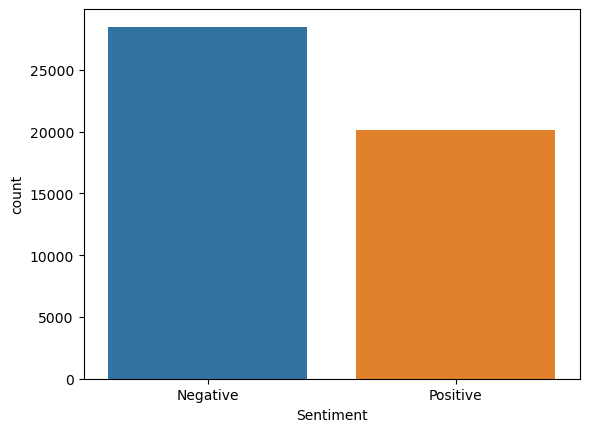

In [87]:
# view distribution in a count plot
sns.countplot(x='Sentiment', data=sms_df, hue='Sentiment', legend=False)

The model predicts 58.6% of the messages as negative and 41.39% as positive.

Now the sentiment will be compared by country. To do this sentiment will be transformed to a numeric value. Positve messages will be assigned a '1' and negative messages will be assigned a '-1'. 

In [89]:
# Define a function to convert sentiment into binary values
def convert_sentiment(sentiment):
    """
    Takes in sentiments, and converts them to binary values.
    """
    if sentiment == 'Positive':
        return 1
    else:
        return -1

# Create new feature based on the values returned from function
sms_df['Sentiment_score'] = sms_df['Sentiment'].apply(convert_sentiment)
#check 
sms_df.head()

,Unnamed: 0,id,Message,length,country,Date,Message_cleaned,Message_tokenized,Sentiment,Sentiment_score
0,0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat...,"[bugis, oso, near, wat, ...]",Negative,-1
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...",Negative,-1
2,2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when... lets go learn pilates...,"[i, dunno, until, when, ..., lets, go, learn, ...",Negative,-1
3,3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price... haiz......,"[den, only, weekdays, got, special, price, ......",Negative,-1
4,4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la...,"[meet, after, lunch, la, ...]",Negative,-1


Now to group by country and get mean sentiment score for each country

In [91]:
#create a new dataframe grouped by countries and aggregated by the mean.
df_sent = sms_df.groupby(['country'])['Sentiment_score'].mean()

#reset the index
df_sent = df_sent.reset_index()

df_sent.head()

,country,Sentiment_score
0,Australia,0.333333
1,Bangladesh,-0.031746
2,Barbados,-1.000000
3,Canada,-0.161616
4,China,0.028037


In [92]:
# Sort DataFrame by Sentiment_score
df_sent.sort_values(by='Sentiment_score') 

,country,Sentiment_score
2,Barbados,-1.000000
13,Lebanon,-0.600000
19,Nigeria,-0.600000
29,Turkey,-0.600000
22,Romania,-0.555556
11,Jamaica,-0.500000
10,Italia,-0.400000
24,Singapore,-0.263287
25,Slovenia,-0.200000
14,Macedonia,-0.200000


Now to plot sentiment by country see which countries are the most postive/negative

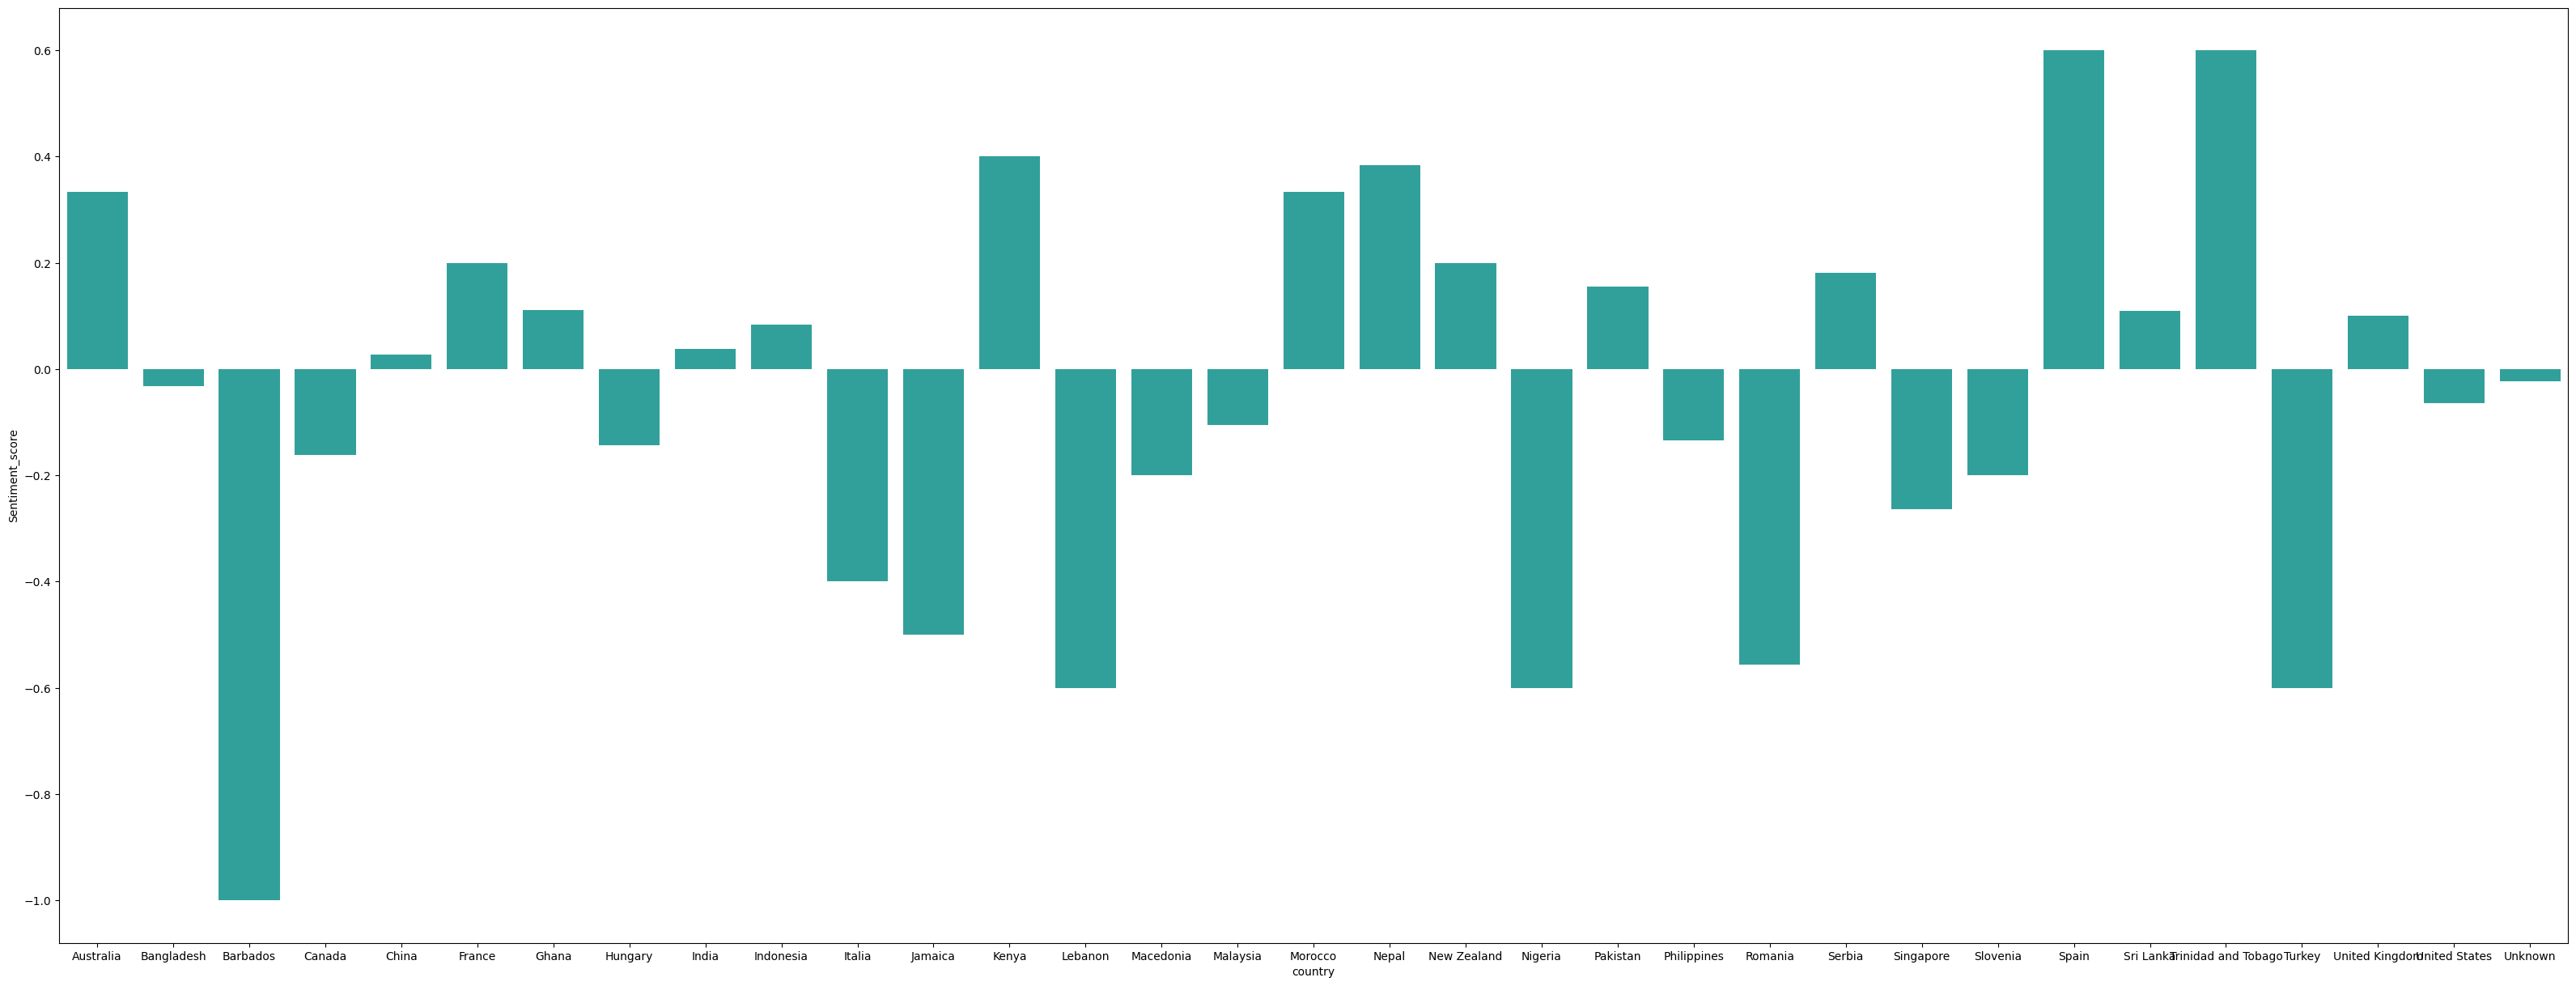

In [94]:
# Plot general sentiments
fix, ax = plt.subplots(figsize=(40,15))
sns.barplot(x='country', y='Sentiment_score', data=df_sent, ax=ax, color='lightseagreen')
plt.show()

# 2. Length and Readability Analysis

We will now analyze the length of the messages and determine the complexity of the text, whether it is simple or complex.

In [97]:
# Summary statistics
char_count_summary = sms_df['length'].describe()
print(char_count_summary)

count     48595
unique      470
top          20
freq        861
Name: length, dtype: object


To do readabiltiy analysis we will use the `textstat` library of Python

In [99]:
# import textstat library
import textstat

In [111]:
#define function to calculate readability scores
def calculate_readability_scores(text):
    scores = {
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'smog_index': textstat.smog_index(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'coleman_liau_index': textstat.coleman_liau_index(text),
        'automated_readability_index': textstat.automated_readability_index(text),
        'dale_chall_readability_score': textstat.dale_chall_readability_score(text),
        'difficult_words': textstat.difficult_words(text),
        'linsear_write_formula': textstat.linsear_write_formula(text),
        'gunning_fog': textstat.gunning_fog(text),
        'text_standard': textstat.text_standard(text)
    }
    return scores

# Apply readability scores to each message
readability_scores = sms_df['Message_cleaned'].apply(lambda text: calculate_readability_scores(str(text)))

# Convert the readability scores to a DataFrame
readability_df = pd.DataFrame(list(readability_scores))
readability_df.head()

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
0,118.18,0.0,-2.3,-1.46,1.8,15.68,0,1.000000,1.60,1st and 2nd grade
1,90.05,3.1,2.4,3.83,3.6,11.86,3,2.333333,2.68,2nd and 3rd grade
2,84.34,0.0,2.5,0.75,3.6,9.76,2,1.000000,1.60,0th and 1st grade
3,96.89,3.1,1.8,4.54,4.6,10.36,3,3.166667,3.32,4th and 5th grade
4,92.80,0.0,1.3,0.00,2.9,7.78,0,1.000000,1.60,-1th and 0th grade


In [115]:
# Summary statistics for each readability score
readability_summary = readability_df.describe()
readability_summary

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog
count,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000,48598.000000
mean,94.876661,0.777456,1.602317,-0.258100,1.678721,10.358333,1.246821,2.528886,3.694154
std,28.331389,2.098587,4.199393,8.364183,6.854139,5.035716,1.697062,2.272459,3.668134
min,-1316.990000,0.000000,-15.700000,-39.610000,-16.300000,0.000000,0.000000,-1.000000,0.000000
25%,84.680000,0.000000,-1.000000,-3.170000,-1.700000,7.780000,0.000000,1.000000,1.600000
50%,98.210000,0.000000,1.300000,0.450000,1.100000,9.950000,1.000000,2.000000,2.400000
75%,113.100000,0.000000,3.300000,3.690000,3.900000,12.790000,2.000000,3.500000,4.670000
max,206.840000,14.100000,197.200000,424.400000,360.600000,130.010000,26.000000,36.000000,41.200000


In [117]:
readability_df['text_standard'].value_counts()

text_standard
-1th and 0th grade       10465
1st and 2nd grade         9129
2nd and 3rd grade         7130
0th and 1st grade         7046
3rd and 4th grade         4363
4th and 5th grade         2630
5th and 6th grade         2206
6th and 7th grade         1062
7th and 8th grade          853
8th and 9th grade          721
-3th and -2th grade        625
-4th and -3th grade        471
9th and 10th grade         429
11th and 12th grade        336
12th and 13th grade        300
10th and 11th grade        179
-2th and -1th grade        149
14th and 15th grade        131
-5th and -4th grade         78
19th and 20th grade         73
13th and 14th grade         41
15th and 16th grade         29
20th and 21st grade         20
16th and 17th grade         17
31st and 32nd grade         16
17th and 18th grade         15
43rd and 44th grade         12
18th and 19th grade         12
26th and 27th grade          6
21st and 22nd grade          6
55th and 56th grade          6
22nd and 23rd grade      

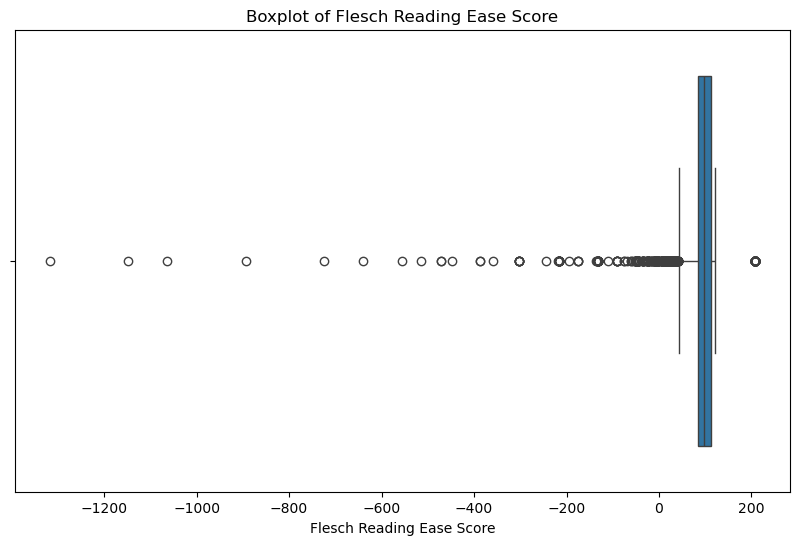

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=readability_df['flesch_reading_ease'])
plt.title('Boxplot of Flesch Reading Ease Score')
plt.xlabel('Flesch Reading Ease Score')
plt.show()


Most of the text are of low grade in terms of the text standard being around -1th to 0th grade. Based on the Flesch Reading Ease Score most the messages are at least readable can be easily understood by the average person, though there are a large amount of outliers that have very low readability.